In [73]:
import torch
import numpy as np
from nltk import word_tokenize as tokenize
import matplotlib.pyplot as plt
from math import sin
from math import cos
import math

In [74]:
sentence='''If your problem involves one or more constantly changing patterns, hardcoded solutions such as handwritten rules can become outdated quickly. Figuring
how your problem has changed so that you can update your handwritten rules accordingly can be too expensive or impossible. Because ML learns from data,
you can update your ML model with new data without having to figure out how the data has changed'''
tokens=tokenize(sentence)

In [75]:
values=np.ndarray([len(tokens),len(tokens)+1])
num_positions=len(tokens)
d_model=128

In [76]:
def odd_idx(pos,idx1):
    return cos(pos/math.pow(10000,idx1/d_model))
def even_idx(pos,idx):
    return sin(pos/math.pow(10000,idx/d_model))

In [77]:
for i in range(len(tokens)):
    for j in range(0,len(tokens),2):
        values[i,j]=even_idx(i,j)
        values[i,j+1]=odd_idx(i,j+1)
values

array([[ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.84147098,  0.59737533,  0.76172041, ...,  0.99996753,
         0.00749887,  0.99997565],
       [ 0.90929743, -0.28628544,  0.98704625, ...,  0.99987013,
         0.01499732,  0.99990261],
       ...,
       [-0.02655115,  0.15605748,  0.56874363, ...,  0.86186739,
         0.47497021,  0.89580011],
       [-0.85551998,  0.88536103,  0.99501869, ...,  0.85775276,
         0.48155588,  0.89267676],
       [-0.89792768,  0.90172818,  0.72061327, ...,  0.85358242,
         0.48811446,  0.88950995]])

In [78]:
PE = np.zeros((num_positions, d_model))

for pos in range(num_positions):
    for i in range(0, d_model, 2):
        PE[pos, i] = np.sin(pos / (10000 ** (i / d_model)))
        PE[pos, i + 1] = np.cos(pos / (10000 ** (i / d_model)))

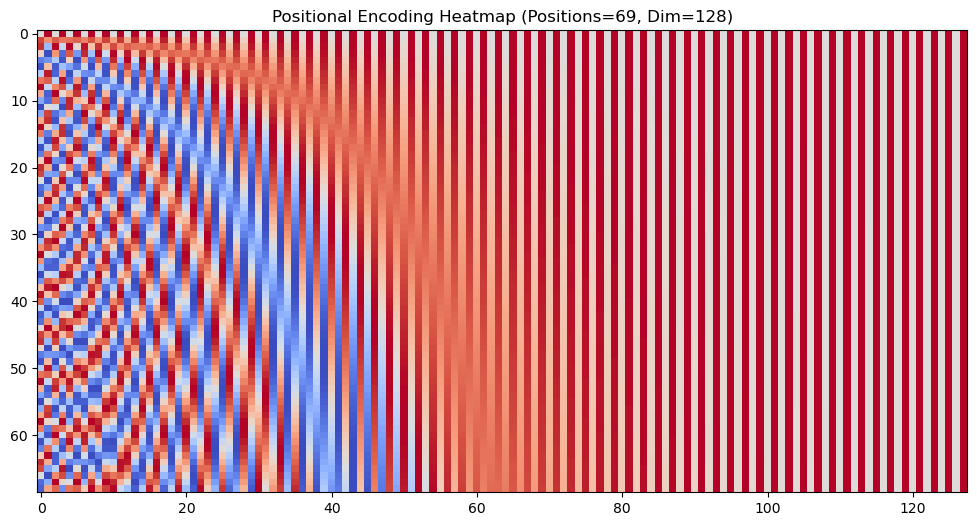

In [79]:
plt.figure(figsize=(12, 6))
plt.imshow(PE, aspect='auto', cmap='coolwarm')
plt.title(f"Positional Encoding Heatmap (Positions={num_positions}, Dim=128)")
plt.show()

In [80]:
PE.shape

(69, 128)